In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/ACB.VN.csv')

In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,8533.238281,8619.142578,8447.333008,8590.507813,8254.484375,5164405.0
1,2019-03-04,8590.507813,8733.682617,8561.873047,8705.047852,8364.543945,10898750.0
2,2019-03-05,8705.047852,8790.953125,8619.142578,8676.413086,8337.029297,8611453.0
3,2019-03-06,8647.778320,8705.047852,8590.507813,8676.413086,8337.029297,11100248.0
4,2019-03-07,8705.047852,8790.953125,8676.413086,8733.682617,8392.058594,11530669.0
5,2019-03-08,8705.047852,8762.318359,8647.778320,8676.413086,8337.029297,4948093.0
6,2019-03-11,8676.413086,8762.318359,8647.778320,8705.047852,8364.543945,9866759.0
7,2019-03-12,8733.682617,8848.223633,8676.413086,8848.223633,8502.119141,8745639.0
8,2019-03-13,8905.493164,9077.303711,8848.223633,8991.398438,8639.694336,19114578.0
9,2019-03-14,8991.398438,9163.208008,8962.763672,9020.033203,8667.208984,8148129.0


In [ ]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [ ]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

In [ ]:
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [ ]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# Compile the model with the Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

In [ ]:
# Train the linear regression model
model.fit(X_train, y_train, epochs=100, verbose=0)


In [ ]:
#Predict
X_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(X_test)


8/8 [==============================] - 0s 2ms/step


In [ ]:
#Validate
X_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(X_val)

4/4 [==============================] - 0s 3ms/step


In [ ]:
last_index = df.index[-1]

# Create arrays of consecutive integers for the next 30, 60, and 90 days
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)

# Use the predictions of the first 30 days to predict the next 30 days
x_next_60_days = np.array(range(last_index + 31, last_index + 61)).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)

# Use the predictions of the first 60 days to predict the next 30 days
x_next_90_days = np.array(range(last_index + 61, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)


1/1 [==============================] - 0s 20ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error
#Đánh giá độ chính xác của thuật toán
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MAE, RMSE cho testing
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mape_test = calculate_mape(y_test, y_pred)

# Tính MAE, RMSE cho validation
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
mape_val = calculate_mape(y_val, y_pred_val)

# In kết quả
print('---------VALIDATE----------')
print("MAPE:", round(mape_val, 3))
print("MAE:", round(mae_val, 3))
print("RMSE:", round(rmse_val, 3))
print('--------------------------')
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print('-------------------')

---------VALIDATE----------
MAPE: 25.654
MAE: 5095.602
RMSE: 5225.921
--------------------------
---------TEST----------
MAPE: 20.154
MAE: 3484.555
RMSE: 3630.02
-------------------


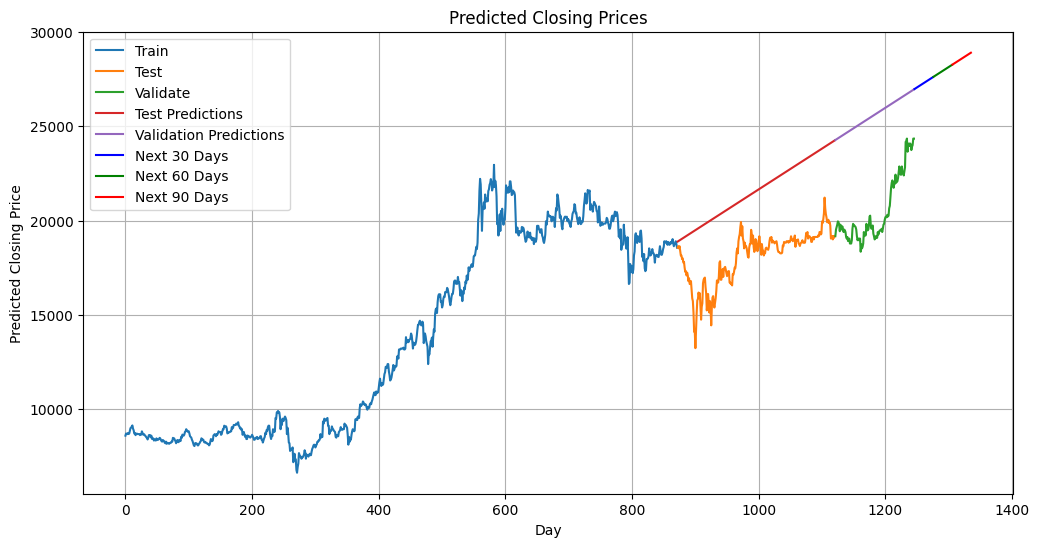

In [ ]:
plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')
plt.plot(val_data.index, val_data['Close'], label='Validate')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')
plt.plot(val_data.index, y_pred_val, label='Validation Predictions')

# Plot the predictions for the next 30, 60, and 90 days
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next 30 Days', color='blue')
plt.plot(range(last_index + 31, last_index + 61), y_next_60_days, label='Next 60 Days', color='green')
plt.plot(range(last_index + 61, last_index + 91), y_next_90_days, label='Next 90 Days', color='red')


# Adding titles and labels
plt.title('Predicted Closing Prices')
plt.xlabel('Day')
plt.ylabel('Predicted Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()